

## This notebook experiments on randomly selects 500 rows out of full dataset and run ML based on these data



In [33]:
import pandas as pd
import numpy as np

In [34]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [35]:
y_2house = np.load('y_2house.npy')

### To randomly select samples out of full dataset

In [36]:
from random import sample
# create random index
rindex =  np.array(sample(range(len(X_2house)), 500))
print(rindex[0:10])
# get 10 random rows from df
X_2hrand = X_2house.iloc[rindex]

[1486537  845758 1546039   64165 2105505 3527057 1674762 2870606 3552362
  382318]


In [37]:
X_2hrand.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch_2,Pool Area_2,Pool QC_2,Fence_2,Misc Feature_2,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
1486537,20.0,4.0,60.0,8281.0,1.0,1.0,0.0,3.0,4.0,4.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,7.0,2008.0,0.0,3.0
845758,50.0,8.0,60.0,7500.0,1.0,1.0,3.0,3.0,4.0,4.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,10.0,2007.0,0.0,3.0
1546039,80.0,4.0,0.0,17871.0,1.0,1.0,0.0,3.0,4.0,1.0,...,322.0,0.0,-1.0,4.0,0.0,0.0,6.0,2007.0,4.0,1.0
64165,85.0,4.0,85.0,10625.0,1.0,1.0,3.0,3.0,4.0,4.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,5.0,2006.0,0.0,3.0
2105505,60.0,4.0,43.0,10667.0,1.0,1.0,1.0,3.0,4.0,1.0,...,0.0,0.0,-1.0,2.0,1.0,700.0,3.0,2006.0,0.0,3.0


In [38]:
y_2rand=y_2house[rindex]

In [39]:
print('dimension of X_input:',X_2hrand.shape)
print('dimension of y_input:',y_2rand.shape)

dimension of X_input: (500, 158)
dimension of y_input: (500,)


### Set up the train-test split in sklearn

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2hrand, y_2rand, test_size=0.5, random_state=12)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(250, 158)
(250,)
(250, 158)
(250,)


In [42]:
from sklearn import linear_model
RD_model0 = linear_model.LinearRegression()

In [43]:
RD_model0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
pred_train = RD_model0.predict(X_train)
print('training score of Linear Regression:',RD_model0.score(X_train,pred_train))
pred_test=RD_model0.predict(X_test)
print('testing score of Linear Regression:',RD_model0.score(X_test,pred_test))

training score of Linear Regression: 1.0
testing score of Linear Regression: 1.0


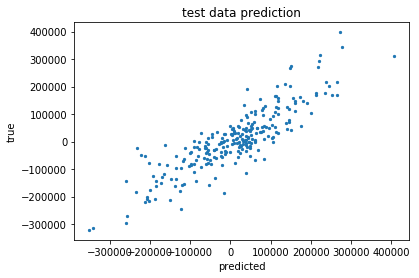

In [24]:
import matplotlib.pyplot as plt
plt.scatter(pred_test,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [25]:
from sklearn import metrics
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test))

MSE score(training): 417736361.81
MAE score(training): 15919.9024676
MSE score: 3540781767.79
MAE score: 46821.2971906


In [47]:
## save a defaultdict for the coef of each attribute:
weights=zip(list(X_2hrand.columns),RD_model0.coef_) # use a iterable to print the coefficient and their corresponding column name
m0_coef=dict(zip(X_2hrand.columns, RD_model0.coef_))

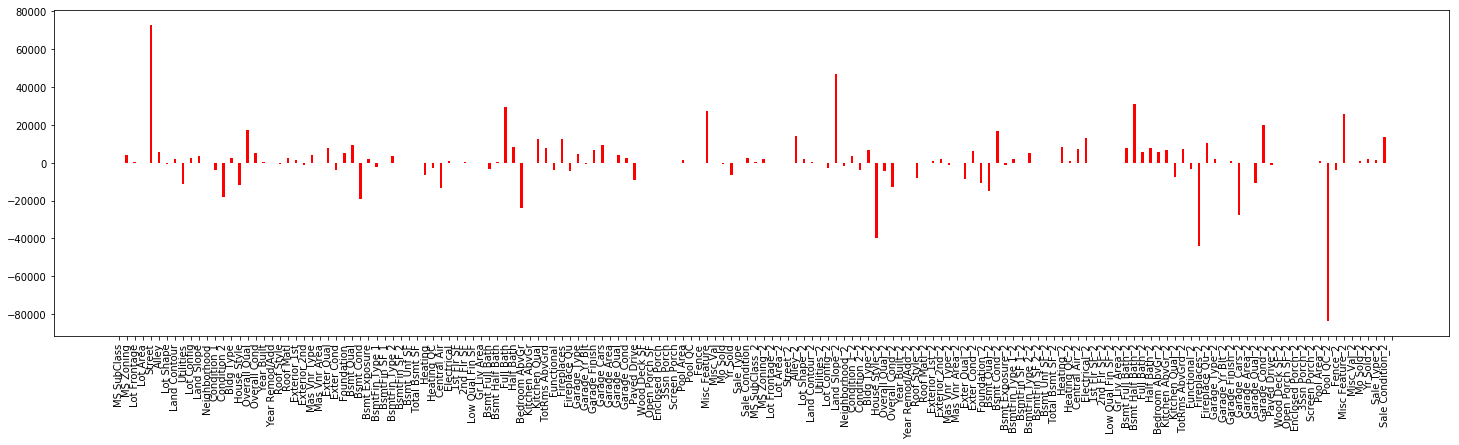

In [44]:
# plot a histogram chart to illustrate :

x_tick_label=list(X_2hrand.columns)
hist_val=RD_model0.coef_
fig, ax = plt.subplots(figsize=(25,6))
index=np.arange(len(RD_model0.coef_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(0, 159, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

In [48]:
for cols, coef in weights:
    if abs(coef)>10000: print(cols,':',coef)  

Street : 72940.05525
Utilities : -11424.1748198
Condition 2 : -17892.0282861
House Style : -11772.5678796
Overall Qual : 17286.9672436
Bsmt Cond : -19008.7229314
Central Air : -13626.3009216
Full Bath : 29374.5257262
Bedroom AbvGr : -23858.4102363
Kitchen Qual : 12471.3415665
Fireplaces : 12522.8976639
Misc Feature : 27426.2284645
Alley_2 : 14294.1695083
Land Slope_2 : 46587.8820927
House Style_2 : -40054.0295915
Overall Cond_2 : -12859.1548769
Foundation_2 : -10508.0089338
Bsmt Qual_2 : -14841.0189143
Bsmt Cond_2 : 16865.79327
Electrical_2 : 13084.7709841
Bsmt Half Bath_2 : 30934.3838176
Fireplaces_2 : -44164.015518
Fireplace Qu_2 : 10173.726801
Garage Cars_2 : -27575.1674786
Garage Qual_2 : -10855.4268536
Garage Cond_2 : 20016.6268724
Pool QC_2 : -83730.5888203
Misc Feature_2 : 25738.2733771
Sale Condition_2 : 13724.8252518


### Do cross-validation to check performance of this model

In [56]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)
k_fold.get_n_splits(X_train)
scores = np.sqrt(-1*cross_val_score(RD_model0, X_train, y_train,verbose=10, cv=20,scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

[CV]  ................................................................
[CV] ....................... , score=-6100664767.204732, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-2300213415.310832, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-17863367722.064594, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-12031768247580.496, total=   0.0s
[CV]  ................................................................
[CV] ...................... , score=-13932419470.278801, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-5304167321.611185, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-4568821748.578092, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


In [57]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(27556.541305868086, 3468683.9359590686), mean=262217.93197724276, variance=580117106829.33936, skewness=4.014353069403241, kurtosis=14.407107766497653)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


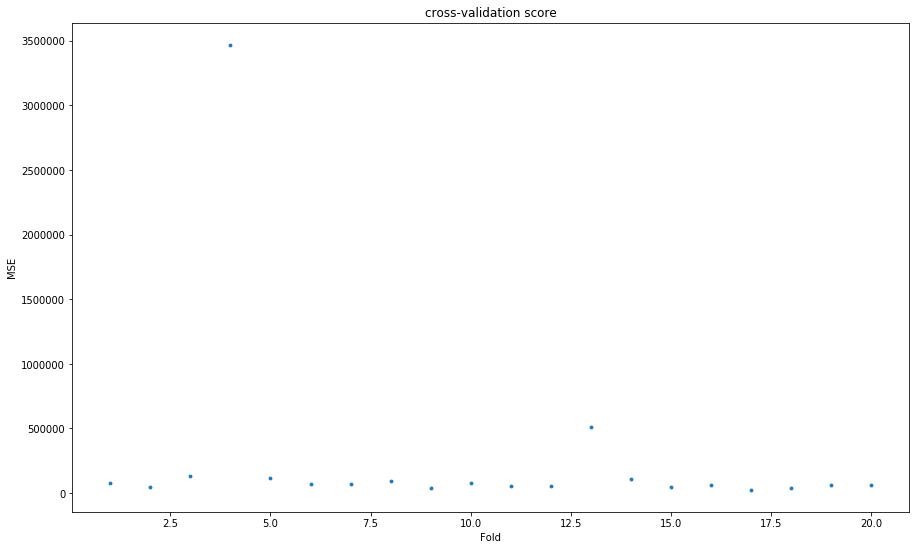

In [58]:
## Plot the variation of the cross-validation scores
stp=np.array([x for x in range(1,21)])
print(stp)
fig = plt.figure(figsize=(15,9))
ax = plt.gca()
ax.scatter(stp,scores,s=8)
plt.title('cross-validation score')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()